# Compare climate data
We are using the HistAlp climate dataset. Here I'd try to assess its usabillity and compare it to actual climate records from the region. Therefore I use monthly precipitation from following stations:
 - Eigergletscher (7°58'/46°35'),  2320 m asl., data from 1908 until 1952
 - Kleine Schneidegg (7°58'/46°35'), 2060 m asl., data since 1960
 - HistAlp (8°05'/46°35'), 2011 m asl., data between 1801 and 2014
 
In addition I look at more recent records (last 10 to 20 years) from the following six SLF stations:
- SLFFIR: Grindelwald / First (8°04'/46°40'), 2110 m asl., data from 2000 until 2018
- SLFGAD: Gadmen / Gschletteregg (8°24'/46°45'), 2060 m asl., data from 2000 until 2018
- SLFGO3: Goms / Treichbode (8°14'/46°29'), 2430 m asl., data from 2004 until 2018
- SLFGU2: Guttannen / Homad (8°17'/46°41'), 2110 m asl., data from 2000 until 2018
- SLFSH2: Schilthorn / Türliboden (7°50'/46°35'), 2360 m asl., data from 2000 until 2018
- SLFUR2: Urseren / Giltnasen (8°31'/46°35'), 2170 m asl., data from 1998 until 2018


In [1108]:
# 
import os
import calendar

# import section
import numpy as np
import pandas as pd
import xarray as xr

# plotting modules
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

# my modules
import sys
sys.path.append('../code/')
import utils as mutils
import mycolors

## Housekeeping
Define some path variables and other which should be consistend throughout the notebook...

In [689]:
path_station_data = '../raw_data/station_data/'
path_climate_data = '../raw_data/climate_data//'
path_figures = '../figures/'

## Read data
The data is prepared using other scripts/notebooks and therefore just be read via pandas or xarray.

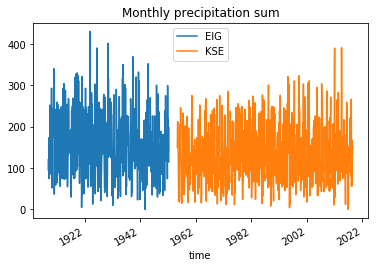

In [685]:
# read the IDAWEB precipitation data
path = os.path.join(path_station_data, 'monthly_precip_eiger_scheidegg.csv')
longterm_df = pd.read_csv(path, index_col=0, parse_dates=True)
# drop parameter name in column name
longterm_df.columns = [c.split('_')[-1] for c in longterm_df.columns]
# visualize
longterm_df.plot(title='Monthly precipitation sum');

In [686]:
# compute number of month availiable to compare with HistAlp
print('Number of month: ', sum(longterm_df.loc[:'2014-09-01'].count()))

Number of month:  1235


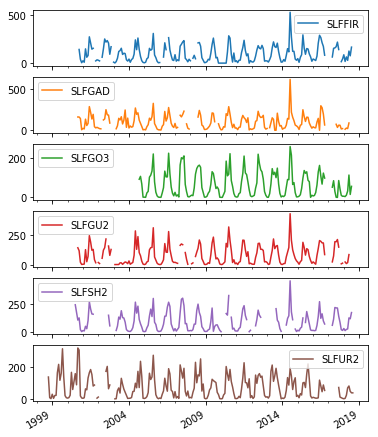

In [687]:
# read the IDAWEB precipitation data
path = os.path.join(path_station_data, 'monthly_precip_slf.csv')
recent_df = pd.read_csv(path, index_col=0, parse_dates=True)
# visualize
recent_df.plot(subplots=True, figsize=[6,8]);

In [690]:
# read histalp data
path = os.path.join(path_climate_data, 'climate_hs.nc')
dsh = xr.open_dataset(path)
dsh

<xarray.Dataset>
Dimensions:  (time: 2556)
Coordinates:
  * time     (time) datetime64[ns] 1801-10-01 1801-11-01 1801-12-01 ...
Data variables:
    prcp     (time) float32 ...
    temp     (time) float32 ...
    grad     (time) float32 ...
Attributes:
    ref_hgt:      2011.0
    ref_pix_lon:  8.08333333333175
    ref_pix_lat:  46.58333333333195
    ref_pix_dis:  4406.84932272399
    author:       OGGM
    author_info:  Open Global Glacier Model

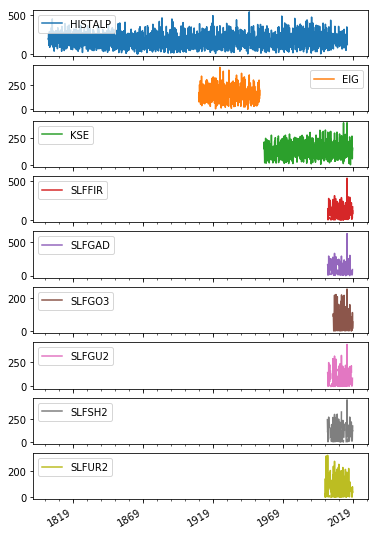

In [6]:
# convert precipitation data into DataFrame
histalp_df = dsh.prcp.to_dataframe()
histalp_df.columns = ['HISTALP']
# add both DataFrames
precip_df = pd.concat([histalp_df, longterm_df, recent_df], axis=1)
precip_df.plot(subplots=True, figsize=[6,10]);

## First look

In [34]:
# get basic statistics:
# takes only numeric data points, so it is 
# somehow weighted per lenght of the data series
precip_df.describe()

,HISTALP,EIG,KSE,SLFFIR,SLFGAD,SLFGO3,SLFGU2,SLFSH2,SLFUR2
count,2556.000000,522.000000,759.000000,200.000000,192.000000,162.000000,196.000000,177.000000,221.000000
mean,178.058289,156.371648,132.891436,98.486000,99.844792,65.041975,79.061224,91.794350,74.085973
std,81.872162,74.526888,67.100315,86.498723,86.736729,62.735554,79.808766,86.485754,71.222931
min,4.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.200000,0.200000
25%,120.000000,103.250000,83.250000,26.100000,29.300000,9.050000,12.550000,16.000000,9.800000
50%,174.000000,150.000000,125.000000,74.900000,77.700000,47.800000,50.600000,68.600000,52.200000
75%,229.000000,200.750000,174.500000,154.700000,156.900000,110.450000,128.900000,141.600000,125.200000
max,543.000000,430.000000,390.700000,532.600000,621.800000,255.000000,429.000000,460.200000,316.800000


In [36]:
precip_df.describe().T

,count,mean,std,min,25%,50%,75%,max
HISTALP,2556.0,178.058289,81.872162,4.0,120.00,174.0,229.00,543.0
EIG,522.0,156.371648,74.526888,0.0,103.25,150.0,200.75,430.0
KSE,759.0,132.891436,67.100315,0.1,83.25,125.0,174.50,390.7
SLFFIR,200.0,98.486000,86.498723,0.0,26.10,74.9,154.70,532.6
SLFGAD,192.0,99.844792,86.736729,0.0,29.30,77.7,156.90,621.8
SLFGO3,162.0,65.041975,62.735554,0.0,9.05,47.8,110.45,255.0
SLFGU2,196.0,79.061224,79.808766,0.0,12.55,50.6,128.90,429.0
SLFSH2,177.0,91.794350,86.485754,0.2,16.00,68.6,141.60,460.2
SLFUR2,221.0,74.085973,71.222931,0.2,9.80,52.2,125.20,316.8


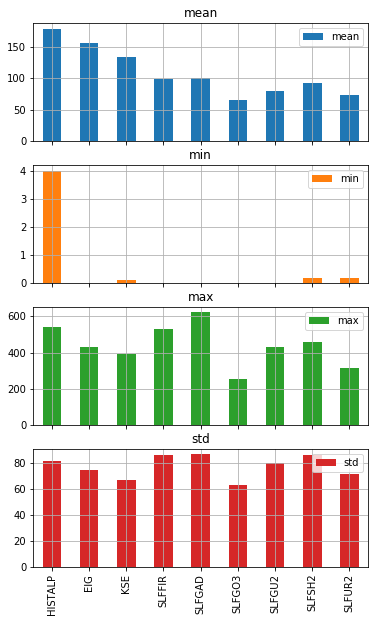

In [48]:
df2plot = precip_df.describe().T[['mean', 'min', 'max', 'std']]
df2plot.plot(subplots=True, figsize=[6,10], kind='bar', grid=True)
plt.gca().set_xticklabels(df2plot.index);

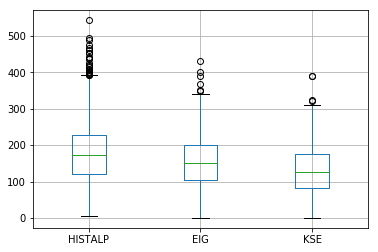

In [1110]:
precip_df[['HISTALP', 'EIG', 'KSE']].boxplot()

**First impressions**

Disclaimer: The following qualitive observations are questionable, due to the large difference in sample size...

The HistAlp data shows a higher average monthly precipitation sum than all stations. Since rain gauges are prone to undercatch (), this is not too suprising. On the other hand, all the SLF stations show significantly less precipitation. Was there less precipitation in the last 20ish years than throughout the 19th and 20th century?! *TODO:* I'll have to look into that...

The standard deviation and the IQR is comparable over all stations. The overall ranges are quite different. Some outliers in the SLF data are quite large... The raw data outlier correction is not done very scientifically, which could explain those data points. *TODO:* Ask Fabi...

### Long term records

In [750]:
# read long term precipitation stations
path = os.path.join(path_station_data, 'monthly_precip_stations.csv')
pd.read_csv(path, index_col=0)

,Name,Parameter,Datenquelle,Länge/Breite,Koordinaten [km],Höhe ü. M. [m]
stn,,,,,,
EIG,Eigergletscher,rre150m0,MeteoSchweiz,7°58'/46°35',640950/158350,2320
KSE,Kleine Scheidegg,rre150m0,MeteoSchweiz,7°58'/46°35',639896/159346,2060


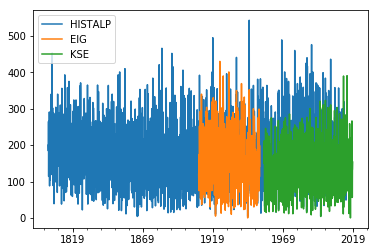

In [450]:
# select stations with long term precipitation records and the HistAlp data
precip_long_term_df = precip_df[['HISTALP', 'EIG', 'KSE']].copy().dropna(how='all')
precip_long_term_df.plot()

In [485]:
# compute yearly precipitation sums
precip_long_term_yearly_df = precip_long_term_df.resample('Y').sum(min_count=12)
# get information about measurement period
for stn in precip_long_term_yearly_df:
    tmp = precip_long_term_yearly_df[stn].dropna().index
    print('{}: from {} until {}'.format(stn, tmp[0].year, tmp[-1].year))

HISTALP: from 1802 until 2013
EIG: from 1909 until 1951
KSE: from 1956 until 2017


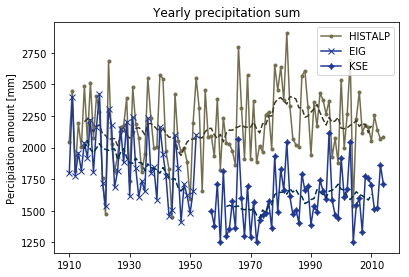

In [1168]:
# subset for period with station data
df = precip_long_term_yearly_df.loc['1909':'2013'].copy()

# create figure and axes
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])

# rolling average window
window = 10

# plot HistAlp data
ax.plot(df.HISTALP, marker='.', color=mycolors.histalp)
if window > 0:
    ax.plot(df.HISTALP.rolling(window, center=True).mean(), label='', ls='--', c=mycolors.histalp2)
# plot Eigergletscher data
ax.plot(df.EIG, marker='x', color=mycolors.precip)
if window > 0:
    ax.plot(df.EIG.rolling(window, center=True).mean(), label='', ls='--', c=mycolors.precip2)
# plot Kleine Scheidegg data
ax.plot(df.KSE, marker=(4, 1, 0), color=mycolors.precip)
if window > 0:
    ax.plot(df.KSE.rolling(window, center=True).mean(), label='', ls='--', c=mycolors.precip2)

# title, labels, ...
ax.set_title('Yearly precipitation sum')
ax.set_ylabel('Percipiation amount [mm]')

# legend
ax.legend()

# save figure to file
fig.savefig(os.path.join(path_figures, 'precip_timeseries.eps'), bbox_inches='tight')

#### How about the precipitation scaling factor

In [1200]:
# create 'station' row with EIG and KSE data combined
both = [[EIG,KSE] for EIG, KSE in zip(df.EIG.values, df.KSE.values)]
df['station'] = np.nansum(both, axis=1)
df_st = df.drop(['EIG', 'KSE'], axis=1)
# compute factor
df_st['factor'] = df_st.station/df_st.HISTALP
df_st.loc[df_st.factor == 0, 'factor'] = np.NAN
factor = df_st.factor

In [1212]:
# get numbers
factor.describe()

count    101.000000
mean       0.794806
std        0.111236
min        0.608316
25%        0.700927
50%        0.776012
75%        0.877930
max        1.073014
Name: factor, dtype: float64

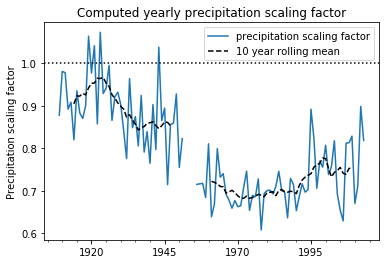

In [1215]:
# visulize
factor.plot(label='precipitation scaling factor')
factor.rolling(10, center=True).mean().plot(ls='--', c='k', label='10 year rolling mean')
plt.axhline(1, ls=':', c='k')
# cosmetics
plt.title('Computed yearly precipitation scaling factor')
plt.ylabel('Precipitation scaling factor')
plt.legend()
# save to file
path = os.path.join(path_figures, 'precip_factor.eps')
plt.gcf().savefig(path, bbox_inches='tight')

## Individual comparison
Compare all stations individually to the HistAlp data set...

In [100]:
# create empty containers
descr = list()
corr = dict()

# iterate over all stations
for stn in precip_df.columns[1:]:
    # get DataFrame with HistAlp and station as column
    df = precip_df[['HISTALP', stn]].dropna()
    # get basic statistics
    descr_tmp = df.describe()[['HISTALP', stn]]
    descr_tmp.columns = pd.MultiIndex.from_product([[stn], descr_tmp.columns])
    descr.append(descr_tmp)
    # compute correlation
    corr[stn] = df.corr().loc[stn, ['HISTALP']].values[-1]
    # plot scatter - or not...
    # df.plot.scatter(0,1)

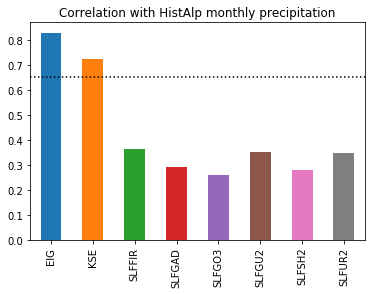

In [90]:
# visualize correlation
pd.Series(corr).plot(kind='bar', title='Correlation with HistAlp monthly precipitation')
plt.gca().axhline(0.65, ls=':', c='k');

The Eigergletscher and Kleine Scheidegg station correlate quite well with the HistAlp data set. All the others show little to no correlation... 

## Don't correlate stuff with a yearly (or daily, ...) cycle
Precipitation and temperature even more so show a strong seasonal cycle. This leads to an overestimated correlation. Correlation the anomalies of each month to the months average is the correct way to do it.

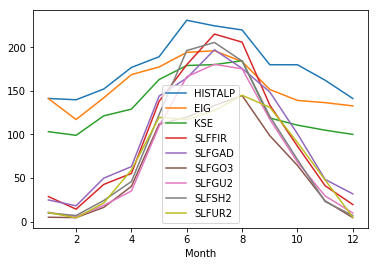

In [378]:
# compute monthly average - e.g. the average May precipitation
precip_month_avg = precip_df.groupby(precip_df.index.month).mean()
precip_month_avg.index.name = 'Month'
precip_month_avg.plot()


In [381]:
# create new DataFrame
precip_diff_df = precip_df.copy()
# compute difference of each month to its average
for month, avg in precip_month_avg.iterrows():
    precip_diff_df.loc[precip_diff_df.index.month == month] = \
        precip_diff_df.loc[precip_diff_df.index.month == month] \
        - avg
    

In [382]:
# let's see if it worked
precip_diff_df.describe()

,HISTALP,EIG,KSE,SLFFIR,SLFGAD,SLFGO3,SLFGU2,SLFSH2,SLFUR2
count,2556.000000,5.220000e+02,7.590000e+02,2.000000e+02,1.920000e+02,1.620000e+02,1.960000e+02,1.770000e+02,2.210000e+02
mean,-0.000004,-1.960118e-15,-9.361564e-17,-2.842171e-15,4.144833e-15,7.894919e-15,2.954553e-15,-4.656664e-15,4.115361e-15
std,75.555252,7.016254e+01,5.868406e+01,4.877133e+01,5.959092e+01,3.481955e+01,4.528279e+01,4.275174e+01,4.835670e+01
min,-193.446014,-1.389302e+02,-1.552063e+02,-1.378778e+02,-1.968556e+02,-1.445077e+02,-1.731600e+02,-2.013765e+02,-1.126889e+02
25%,-53.812202,-5.131250e+01,-4.268571e+01,-2.307337e+01,-2.507545e+01,-1.210000e+01,-1.620000e+01,-1.107059e+01,-2.283158e+01
50%,-4.866196,-1.023864e+01,-9.012698e+00,-3.633750e+00,-5.765882e+00,-1.984615e+00,-2.118067e+00,-5.833333e-01,-2.152941e+00
75%,43.367367,4.208761e+01,3.481641e+01,1.774428e+01,1.551576e+01,9.042857e+00,1.303214e+01,1.160000e+01,1.051111e+01
max,380.887329,2.973182e+02,2.866984e+02,3.175529e+02,4.247444e+02,1.218714e+02,2.486824e+02,2.548235e+02,2.128600e+02


So the mean is around zero, which is a good indicator... Now we can compute the correlation.

In [109]:
corr = np.round(precip_diff_df.corr()['HISTALP'].iloc[1:]*100)
corr

EIG       81.0
KSE       69.0
SLFFIR    16.0
SLFGAD     5.0
SLFGO3    -9.0
SLFGU2    16.0
SLFSH2     3.0
SLFUR2    19.0
Name: HISTALP, dtype: float64

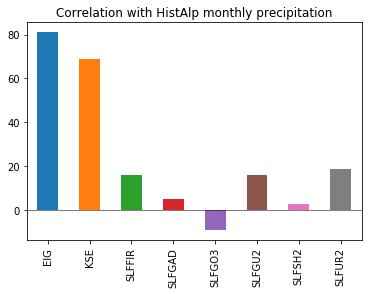

In [111]:
corr.plot(kind='bar', title='Correlation with HistAlp monthly precipitation')
# plt.gca().axhline(65, ls=':', c='k');
plt.gca().axhline(0, ls='-', c='k', lw=0.5);

In [404]:
# what about the correlation between the single SLF stations
precip_diff_slf_df = precip_diff_df.loc[:, precip_diff_df.columns.str.contains('SLF')].dropna(how='all')
slf_corr = precip_diff_slf_df.corr()
slf_corr

,SLFFIR,SLFGAD,SLFGO3,SLFGU2,SLFSH2,SLFUR2
SLFFIR,1.000000,0.658102,0.438606,0.761923,0.602154,0.245119
SLFGAD,0.658102,1.000000,0.527151,0.647325,0.491145,0.221352
SLFGO3,0.438606,0.527151,1.000000,0.425272,0.459014,0.605016
SLFGU2,0.761923,0.647325,0.425272,1.000000,0.584710,0.367799
SLFSH2,0.602154,0.491145,0.459014,0.584710,1.000000,0.320691
SLFUR2,0.245119,0.221352,0.605016,0.367799,0.320691,1.000000


In [410]:
slf_corr.index

Index(['SLFFIR', 'SLFGAD', 'SLFGO3', 'SLFGU2', 'SLFSH2', 'SLFUR2'], dtype='object')

In [419]:
slf_corr.index.values.tolist()

['SLFFIR', 'SLFGAD', 'SLFGO3', 'SLFGU2', 'SLFSH2', 'SLFUR2']

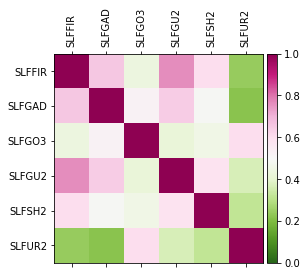

In [441]:
# import
from mpl_toolkits.axes_grid1 import make_axes_locatable

# visualize correlation
im = plt.matshow(slf_corr, cmap='PiYG_r', vmin=0, vmax=1)
im.axes.set_xticklabels(['']+slf_corr.columns.values.tolist(), rotation='vertical')
im.axes.set_yticklabels(['']+slf_corr.index.values.tolist())
# add colorbar
divider = make_axes_locatable(im.axes)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

As seen above, the SLF stations do not even slightly correlate with the HistAlp data. And even between them the correlation is quite low...

### Compare yearly sums?!

In [112]:
# read yearly sum from SLF stations
path = '../raw_data/yearly_precip_slf_stations.csv'
yearly_slf = pd.read_csv(path, index_col=0)
yearly_slf

,SLFFIR,SLFGAD,SLFGO3,SLFGU2,SLFSH2,SLFUR2
1999,NaN,NaN,NaN,NaN,NaN,1202.4
2000,NaN,NaN,NaN,NaN,NaN,1255.6
2001,1202.6,1266.4,NaN,996.0,NaN,NaN
2003,838.2,1167.4,NaN,102.6,NaN,504.4
2004,1123.2,1220.6,NaN,996.4,1048.0,895.6
2005,1028.2,1046.2,730.8,889.8,1051.6,902.8
2006,NaN,NaN,832.2,NaN,1221.8,792.2
2007,NaN,NaN,911.2,NaN,1264.0,891.6
2008,1043.4,NaN,881.4,NaN,1007.2,1137.6
2009,936.4,NaN,595.0,804.2,NaN,664.8


In [127]:
# compute yearly sum from HistAlp data
yearly_histalp = histalp_df['1999':].resample('Y').sum()
# reformat index
yearly_histalp.index = map(int, [i.strftime('%Y') for i in yearly_histalp.index])
# visualize
yearly_histalp.head()

,HISTALP
1999,2535.0
2000,1996.0
2001,2264.0
2002,2697.0
2003,1536.0


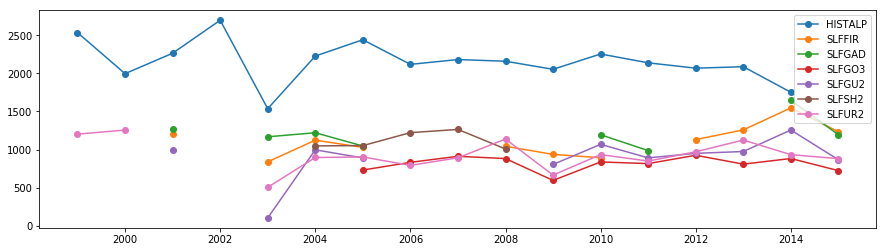

In [131]:
# conbine datasets
yearly = pd.concat([yearly_histalp, yearly_slf], axis=1)
yearly.plot(kind='line', figsize=[15,4], marker='o')

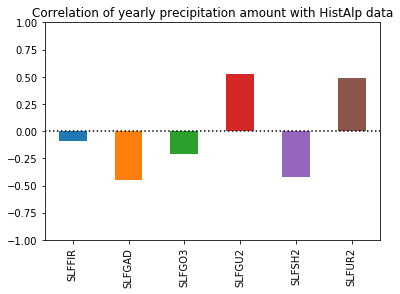

In [149]:
# compute correlation
yearly.corr().loc['HISTALP', ['SLFFIR', 'SLFGAD', 'SLFGO3', 'SLFGU2', 'SLFSH2', 'SLFUR2']].plot(kind='bar', title='Correlation of yearly precipitation amount with HistAlp data')
plt.axhline(0, color='k', ls=':')
plt.ylim([-1,1]);

No information gain, at all... At least non that I see, which doesn't mean a lot though!

### Distribution of average yearly precipitation (in recent years)

In [691]:
# read the slf station list
path = os.path.join(path_station_data, 'slf_stations.csv')
slf_stations = pd.read_csv(path, index_col=0)

# read the average yearly precipitation amount for the slf stations
path = os.path.join(path_station_data, 'yearly_precip_avg_slf.csv')
yearly_precip_avg = pd.read_csv(path, index_col=0, squeeze=True, names=['yearly_precip_avg'])

# append precipitation data to station list
slf_stations = pd.concat([slf_stations, yearly_precip_avg], axis=1)
slf_stations

,Name,Parameter,Data source,Longitude/Latitude,Coordinates [km],Elevation [m],yearly_precip_avg
SLFFIR,Grindelwald / First,rre150d0,Eidg. Institut für Schnee- und Lawinenforschung,8°04'/46°40',647900/168780,2110,1166.133356
SLFGAD,Gadmen / Gschletteregg,rre150d0,Eidg. Institut für Schnee- und Lawinenforschung,8°24'/46°45',673270/177465,2060,1242.102748
SLFGO3,Goms / Treichbode,rre150d0,Eidg. Institut für Schnee- und Lawinenforschung,8°14'/46°29',660650/148950,2430,802.046200
SLFGU2,Guttannen / Homad,rre150d0,Eidg. Institut für Schnee- und Lawinenforschung,8°17'/46°41',665100/170100,2110,941.062073
SLFSH2,Schilthorn / Türliboden,rre150d0,Eidg. Institut für Schnee- und Lawinenforschung,7°50'/46°35',630380/158450,2360,1135.776210
SLFUR2,Urseren / Giltnasen,rre150d0,Eidg. Institut für Schnee- und Lawinenforschung,8°31'/46°35',682400/160100,2170,913.500802


In [948]:
slf_stations.corr()

,Elevation [m],yearly_precip_avg
Elevation [m],1.000000,-0.506592
yearly_precip_avg,-0.506592,1.000000


In [1084]:
# load regression module from SciKit Learn
from sklearn import linear_model, datasets

# prepare data
x = [[pre] for pre in slf_stations['yearly_precip_avg']]
y = [[ele] for ele in slf_stations['Elevation [m]']]

# create linear regression object
lin_reg = linear_model.LinearRegression()
# compute linear regression line
lin_reg.fit(x,y)
# compute coefficient of determination r**2
r2 = lin_reg.score(x,y)
print('r**2: ', r2)

r**2:  0.25663569484146076


'Coef. of determination $r^2$: 0.26'

In [1094]:
row

Name                                              Grindelwald / First
Parameter                                                    rre150d0
Data source           Eidg. Institut für Schnee- und Lawinenforschung
Longitude/Latitude                                       8°04'/46°40'
Coordinates [km]                                        647900/168780
Elevation [m]                                                    2110
yearly_precip_avg                                             1166.13
Name: SLFFIR, dtype: object

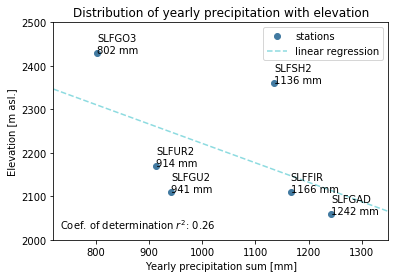

In [1096]:
# visulize relation between precipitation and elevation
plt.plot(slf_stations['yearly_precip_avg'], slf_stations['Elevation [m]'],
         ls='None', marker='o', label='stations', color=mycolors.slf2)
ax = plt.gca()
for ind, row in slf_stations.iterrows():
    ax.text(row['yearly_precip_avg'], row['Elevation [m]'], '{}\n{:.0f} mm'.format(ind, row.yearly_precip_avg))
# plot linear regression line
x = [720, 1350]
ax.plot(x, lin_reg.predict([[x_] for x_ in x]), label='linear regression', color=mycolors.slf, ls='--')
plt.legend(loc=0)

plt.xlabel('Yearly precipitation sum [mm]')
plt.ylabel('Elevation [m asl.]')
plt.title('Distribution of yearly precipitation with elevation')

plt.xlim([720, 1350])
plt.ylim([2000, 2500])

# add text
plt.text(0.02, 0.05, 'Coef. of determination $r^2$: {:.2f}'.format(r2), transform=ax.transAxes)

# save figure
path = os.path.join(path_figures, 'precip_elev_distribution.eps')
plt.gcf().savefig(path, bbox_inches='tight')

No correlation between yearly precipitation sums and elevation... 

### Regional distribution

In [958]:
# subset for neccessary information only
slf = slf_stations[['Coordinates [km]', 'yearly_precip_avg']].copy()
slf.columns = ['coords', 'precip']

In [959]:
# get longitude and latitude parameters
coords = slf.coords.str.split('/')

# specify CH1903+/LV95 EPSG code
EPSG = 2056  

# iterate over all stations
for stn, _ in slf.iterrows():
    # split into lon and lat value and
    # add omitted leading numbers to CH1903+ coords
    lon = float(coords[stn][0]) + 2e6
    lat = float(coords[stn][1]) + 1e6
        # convert into WGS84 coords
    lon, lat = mutils.convert_to_wgs84(lon, lat, EPSG)
    # add to DataFrame
    slf.loc[stn, 'lon'] = lon
    slf.loc[stn, 'lat'] = lat

In [960]:
slf

,coords,precip,lon,lat
SLFFIR,647900/168780,1166.133356,8.064570,46.668533
SLFGAD,673270/177465,1242.102748,8.397452,46.744351
SLFGO3,660650/148950,802.046200,8.228563,46.489124
SLFGU2,665100/170100,941.062073,8.289503,46.678951
SLFSH2,630380/158450,1135.776210,7.834952,46.576636
SLFUR2,682400/160100,913.500802,8.513800,46.587093


In [1101]:
# load interpolation module
import scipy.interpolate as interp

In [1019]:
# compute grid on which precipitation should be interpolated
dlon = 0.005
dlat = dlon
grid_x, grid_y = np.mgrid[min(slf.lon)-dlon:max(slf.lon)+2*dlon:dlon, min(slf.lat)-dlat:max(slf.lat)+2*dlat:dlat]
xi = (grid_x, grid_y)

In [1020]:
# prepare coordinates in needed format
coords = [[lon, lat] for lon, lat in zip(slf.lon.values, slf.lat.values)]

In [1040]:
# interpolate
grid = interp.griddata(coords, slf.precip.values, xi, method='cubic')

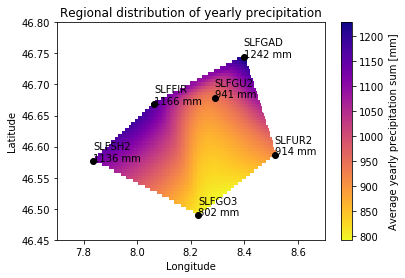

In [1105]:
# show interpolated precipitation distribution
plt.pcolormesh(grid_x, grid_y, grid, cmap='plasma_r')
# add colorbar
cbar = plt.colorbar()
cbar.set_label('Average yearly precipitation sum [mm]')
# plot stations
plt.plot(slf.lon.values, slf.lat.values, ls='None', marker='o', color='k')
# add station names and precip amount
for ind, row in slf.iterrows():
    plt.text(row.lon, row.lat, '{}\n{:.0f} mm'.format(ind, row.precip))
    
# change axis limits
plt.xlim([7.7,8.7])
plt.ylim([46.45,46.8])

# title and labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Regional distribution of yearly precipitation')

# save figure
path = os.path.join(path_figures, 'precip_regional_distribution.eps')
plt.gcf().savefig(path, bbox_inches='tight')

## Temperature

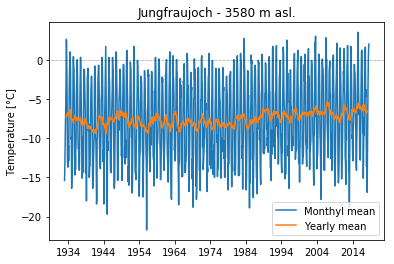

In [692]:
# read the IDAWEB temperature data
path = os.path.join(path_station_data, 'monthly_temp_jungfrau.csv')
jung_df = pd.read_csv(path, index_col=0, parse_dates=True)
# compute annual mean
annual = jung_df.rolling(12, center=True).mean()
# visualize
plt.plot(jung_df, label='Monthyl mean')
plt.plot(annual, label='Yearly mean')
ax = plt.gca()
ax.axhline(0, ls=':', c='k', lw=0.5)
ax.set_ylabel('Temperature [°C]');
ax.legend()
ax.set_title('Jungfraujoch - 3580 m asl.');

In [194]:
# convert temperature data into DataFrame
histalp_temp_df = dsh.temp.to_dataframe()
histalp_temp_df.columns = ['HISTALP']
# combine with data from Jungfraujoch
temp_df = pd.concat([histalp_temp_df, jung_df], axis=1).dropna(how='all')

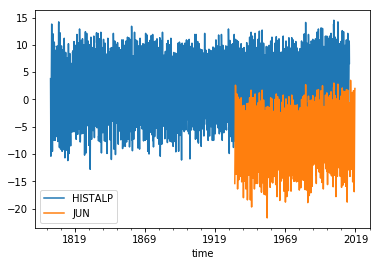

In [195]:
# visualize
temp_df.plot()

In [196]:
# compute basic statistics
temp_df.describe()

,HISTALP,JUN
count,2556.000000,1028.000000
mean,1.741590,-7.530545
std,5.938722,5.330022
min,-13.200000,-21.700000
25%,-3.400000,-12.000000
50%,1.350000,-7.850000
75%,7.200000,-2.700000
max,14.500000,3.500000


In [197]:
# compute correlation
temp_df.corr()[['HISTALP']]

,HISTALP
HISTALP,1.00000
JUN,0.98398


## Don't correlate stuff with a yearly (or daily, ...) cycle
Precipitation and temperature even more so show a strong seasonal cycle. This leads to an overestimated correlation. Correlation the anomalies of each month to the months average is the correct way to do it.

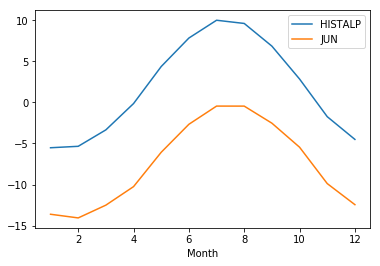

In [198]:
# compute monthly average - e.g. the average May precipitation
temp_month_avg = temp_df.groupby(temp_df.index.month).mean()
temp_month_avg.index.name = 'Month'
temp_month_avg.plot()

In [199]:
# create new DataFrame
temp_diff_df = temp_df.copy()
# compute difference of each month to its average
for month, avg in temp_month_avg.iterrows():
    temp_diff_df.loc[temp_diff_df.index.month == month] = \
        temp_diff_df.loc[temp_diff_df.index.month == month] \
        - avg

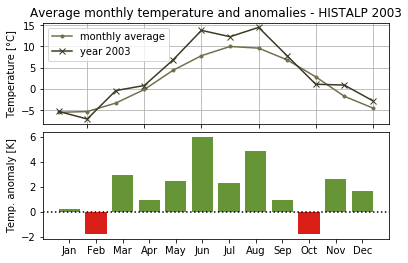

In [1107]:
# select dataset
row = 'HISTALP'

# create figure
fig = plt.figure()
# add first axes
ax = fig.add_axes([0.1,0.5,0.8,0.35])
# plot average monthly temperature
ax.plot(temp_month_avg[row], color=mycolors.histalp, marker='.', label='monthly average')
# plot monthly temperatre mean of one year
year = '2003'
df = temp_df[row].loc[year]
df.index = df.index.month
ax.plot(df, color=mycolors.histalp2, marker='x', label='year {}'.format(year))
# title, labels
ax.set_title('Average monthly temperature and anomalies - {} {}'.format(row, year))
ax.set_xticklabels([0])
ax.set_ylabel('Temperature [°C]')
# grid
ax.grid()
# legend
ax.legend()

# add second axes
ax = fig.add_axes([0.1,0.1,0.8,0.37])
# plot differences
dif = df - temp_month_avg[row]
dif_pos = dif[dif >= 0]
dif_neg = dif[dif < 0]

ax.bar(dif_pos.index, dif_pos, color=mycolors.positive2)
ax.bar(dif_neg.index, dif_neg, color=mycolors.negative)

# add zero line
ax.axhline(0, c='k', ls=':')
# labels
ax.get_xaxis().set_major_locator(FixedLocator(np.arange(1,13)))
ax.set_xticklabels(calendar.month_abbr[1:]);
ax.set_ylabel('Temp. anomaly [K]')

# save to file
fig.savefig(os.path.join(path_figures, 'temp_anomalies_{}.eps'.format(row)), bbox_inches='tight')

time
1    -0.487209
2    -1.941860
3     3.002326
4     0.648837
5     1.968605
6     4.863953
7     1.450000
8     3.453488
9     0.830588
10   -1.844706
11    2.780000
12    1.244706
Name: JUN, dtype: float64

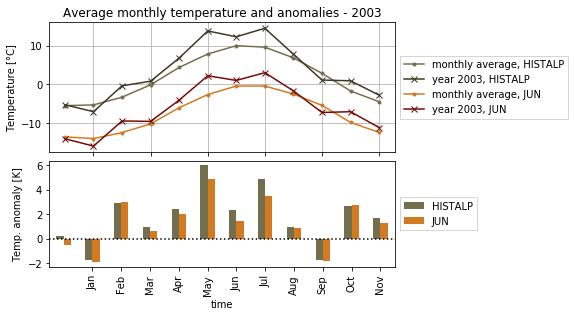

In [928]:
# select dataset and year
year = '2003'

# create figure
fig = plt.figure()
# add first axes
ax = fig.add_axes([0.1,0.5,0.8,0.45])
# histalp
row = 'HISTALP'
# plot average monthly temperature
ax.plot(temp_month_avg[row], color=mycolors.histalp, marker='.', label='monthly average, {}'.format(row))
# plot monthly temperature mean of one year
df_1 = temp_df[row].loc[year]
df_1.index = df_1.index.month
ax.plot(df_1, color=mycolors.histalp2, marker='x', label='year {}, {}'.format(year, row))
# Jungfraujoch
row = 'JUN'
# plot average monthly temperature
ax.plot(temp_month_avg[row], color=mycolors.temp, marker='.', label='monthly average, {}'.format(row))
# plot monthly temperature mean of one year
df_2 = temp_df[row].loc[year]
df_2.index = df_2.index.month
ax.plot(df_2, color=mycolors.temp2, marker='x', label='year {}, {}'.format(year, row))
# title, labels
ax.set_title('Average monthly temperature and anomalies - {}'.format(year))
ax.set_xticklabels([0])
ax.set_ylabel('Temperature [°C]')
# grid
ax.grid()
# legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=False)


# add second axes
ax = fig.add_axes([0.1,0.1,0.8,0.37])
# compute differences
dif_1 = df_1 - temp_month_avg['HISTALP']
dif_2 = df_2 - temp_month_avg['JUN']
dif = pd.concat([dif_1, dif_2], axis=1)

# plot anomalies
colors = [mycolors.histalp, mycolors.temp]
dif.plot(kind='bar', ax=ax, color=colors, label='')
# add zero line
ax.axhline(0, c='k', ls=':')

# labels
ax.get_xaxis().set_major_locator(FixedLocator(np.arange(1,13)))
ax.set_xticklabels(calendar.month_abbr[1:]);
ax.set_ylabel('Temp. anomaly [K]')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=False)

# save to file
fig.savefig(os.path.join(path_figures, 'temp_anomalies.eps'.format(row)), bbox_inches='tight')

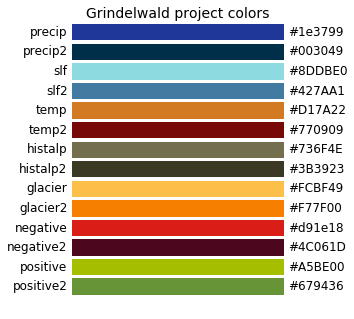

In [908]:
# reload my color module
import mycolors
import importlib
importlib.reload(mycolors)
mycolors.view(hex=True)

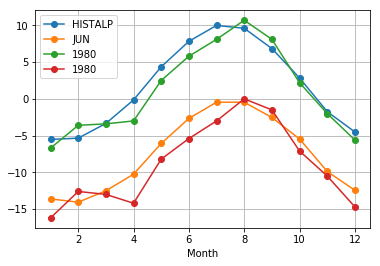

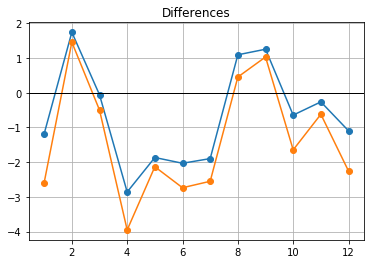

In [1111]:
temp_month_avg.plot(marker='o')
plt.plot(month_ind, temp_df.loc['1980'].values, marker='o', label='1980')
plt.legend()
plt.grid()
plt.figure()
plt.plot(month_ind, temp_diff_df.loc['1980'].values, marker='o')
plt.title('Differences')
plt.axhline(0, c='k', ls='-', lw=1)
plt.grid()

In [201]:
# let's see if it worked
temp_diff_df.describe()

,HISTALP,JUN
count,2.556000e+03,1.028000e+03
mean,1.741500e-07,8.484350e-16
std,1.789265e+00,1.902371e+00
min,-7.856338e+00,-9.144706e+00
25%,-1.143779e+00,-1.247384e+00
50%,3.615028e-02,2.874829e-02
75%,1.193897e+00,1.317240e+00
max,8.237558e+00,6.458140e+00


So the mean is around zero, which is a good indicator... Now we can compute the correlation.

In [489]:
corr = np.round(temp_diff_df.corr().loc['HISTALP', 'JUN']*100, decimals=2)
corr

92.76

### Compute temperature anomaly to climatiological reference period

In [203]:
# compute yearly temperature averages
temp_yearly_df = temp_df.resample('Y').mean()
temp_yearly_df.index = temp_yearly_df.index.year
# compute reference temperature
ref_period_start = 1961
clim_mean = temp_yearly_df.loc[ref_period_start:ref_period_start+29].mean()
clim_mean

HISTALP    1.876111
JUN       -7.898611
dtype: float64

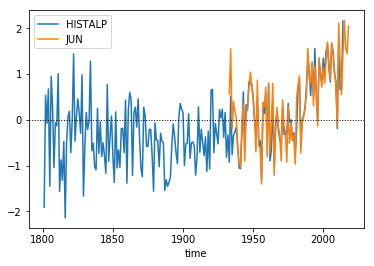

In [204]:
# compute anomalies to reference temperature mean
temp_diff_yearly_df = temp_yearly_df - clim_mean
temp_diff_yearly_df.plot()
plt.axhline(0, c='k', ls=':', lw=1)

In [316]:
# add season to temperature DataFrame
# where 1 corresponds to winter, 2 to spring, ...
# idea from https://stackoverflow.com/questions/44124436/python-datetime-to-season

# define seasons
seasons = {1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}

# create new DataFrame
temp_season_df = temp_df.dropna(how='any').copy()
# compute season
season = (temp_season_df.index.month.values%12 + 3)//3
# create new MultiIndex
temp_season_df.index = pd.MultiIndex.from_arrays([season, temp_season_df.index], names=['season', 'date'])
temp_season_df.head()

HISTALP   JUN
season date                     
1      1933-01-01     -7.6 -15.4
       1933-02-01     -5.9 -13.7
2      1933-03-01     -3.1 -11.0
       1933-04-01      0.3  -8.2
       1933-05-01      2.8  -6.4

In [568]:
# create empty container
temp_diff_yearly_season_df = dict()

# define reference period
ref_period_start = 1961
ref_period_len = 30

# iterate over all seasons
for season, df in temp_season_df.groupby(level=0):
    # drop seasonal index
    df.index = df.index.droplevel()
    # compute yearly temperature averages
    df_yearly = df.resample('Y').mean()
    df_yearly.index = df_yearly.index.year
    # compute reference temperature
    clim_mean_season = df_yearly.loc[ref_period_start:ref_period_start+ref_period_len-1].mean()
    # compute anomalies to reference temperature mean
    df_diff_yearly = df_yearly - clim_mean_season
    # add to container
    temp_diff_yearly_season_df[season] = df_diff_yearly
    

In [840]:
# reload my color module
import mycolors
import importlib
importlib.reload(mycolors)

<module 'mycolors' from '../code/mycolors.py'>

In [664]:
def rgba2rgb(rgba, background = (1.0, 1.0, 1.0)):
    """ Converts RGBA color to RGB color accounting for the transparancy (to the given background).
    RGBA and background colors must be given as tuple. Returned RGB color will also be a tuple.
    Idea from: http://marcodiiga.github.io/rgba-to-rgb-conversion
    """
    alpha = rgba[3]
    
    new_color = ((1 - alpha) * background[0] + alpha * rgba[0],
                 (1 - alpha) * background[1] + alpha * rgba[1],
                 (1 - alpha) * background[2] + alpha * rgba[2])
    return new_color

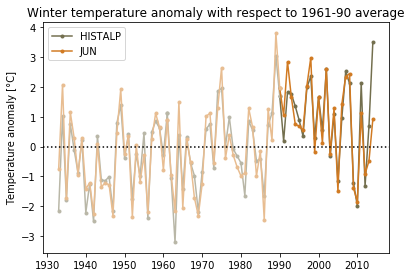

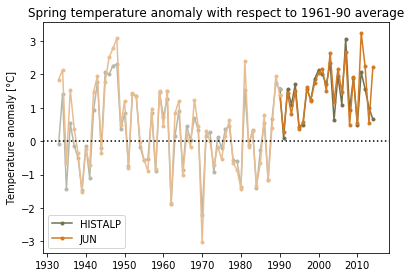

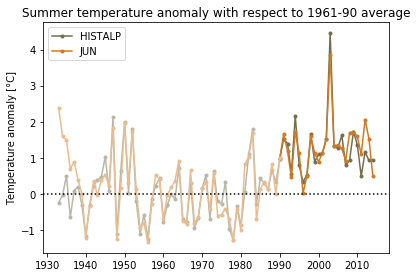

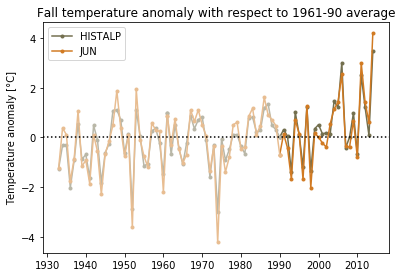

In [932]:
# specify colors
colors = [mycolors.histalp, mycolors.temp]

# specify reference period
ref_period = np.arange(ref_period_start,ref_period_start+ref_period_len)

# iterate over all seasons
for season, df in temp_diff_yearly_season_df.items():
    # create figure and axes
    fig = plt.figure()
    ax = fig.add_axes([0.1,0.1,0.8,0.8])
    
    # plot time series
    for [stn, temp], color in zip(df.iteritems(), colors):
        # adjust colors reference color
        alpha=0.5
        c = mcolors.to_rgb(color)
        c_alpha = rgba2rgb((c[0], c[1], c[2], alpha))

        # plot time series
        ax.plot(temp.loc[:ref_period_start], label='', marker='.', c=c_alpha)
        ax.plot(temp.loc[ref_period_start+ref_period_len-1:], label=stn, marker='.', c=c)
        # plot reference period
        ax.plot(temp.loc[ref_period_start:ref_period_start+ref_period_len-1], label='', marker='.', c=c_alpha)

    # plot reference period average
    ax.axhline(0, c='k', ls=':', label='')
    # title, labels, ...
    ax.set_title('{} temperature anomaly with respect to 1961-90 average'.format(seasons[season].title()))
    ax.set_ylabel('Temperature anomaly [°C]')
    # legend
    ax.legend()
    
    fig.savefig(os.path.join(path_figures, 'tempanomaly_{}.eps'.format(seasons[season])), bbox_inches='tight')

In [677]:
# Find the year of the high summer value
season = 3
print('Season:', seasons[season])
df = temp_diff_yearly_season_df[season]
max_temp_diff = df.max()
df[df==max_temp_diff].dropna(how='all')

Season: summer


,HISTALP,JUN
date,,
2003,4.462223,3.86


In [702]:
colors

['#1e824c', '#d91e18']

In [706]:
for a, color in zip(temp_diff_yearly_df, colors):
    print(a)
    pass

HISTALP
JUN


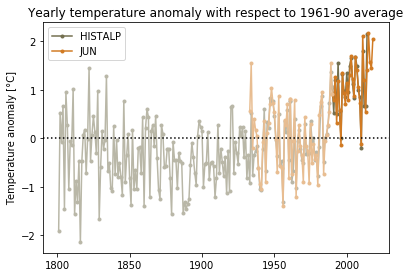

In [931]:
# create figure and axes
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])

# plot time series
for [stn, temp], color in zip(temp_diff_yearly_df.iteritems(), colors):
    # adjust colors reference color
    alpha=0.5
    c = mcolors.to_rgb(color)
    c_alpha = rgba2rgb((c[0], c[1], c[2], alpha))

    # plot time series
    ax.plot(temp.loc[:ref_period_start], label='', marker='.', c=c_alpha)
    ax.plot(temp.loc[ref_period_start+ref_period_len-1:], label=stn, marker='.', c=c)
    # plot reference period
    ax.plot(temp.loc[ref_period_start:ref_period_start+ref_period_len-1], label='', marker='.', c=c_alpha)

# plot reference period average
ax.axhline(0, c='k', ls=':', label='')
# title, labels, ...
ax.set_title('Yearly temperature anomaly with respect to 1961-90 average')
ax.set_ylabel('Temperature anomaly [°C]')
# legend
ax.legend()

fig.savefig(os.path.join(path_figures, 'tempanomaly.eps'), bbox_inches='tight')

# What about the absolute values?!

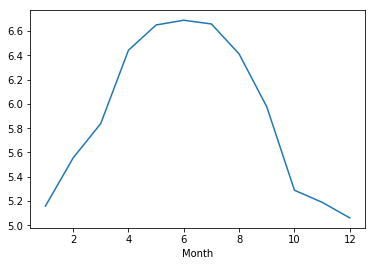

In [377]:
# look at absolute differences
temp_avg_diff = temp_month_avg.HISTALP - temp_month_avg.JUN
(temp_avg_diff / 1569 * 1000) .plot() 

The temperature measured at the Jungfraujoch station is generally colder than in the HistAlp dataset. The differnce ranges between 8°C and 10.5°C, with heigher values in summer and lower ones in winter. How much of the temperature difference can be explained by difference in elevation?!

In [695]:
# get information about the Jungfraujoch station
path = os.path.join(path_station_data, 'monthly_temp_stations.csv')
jun_station = pd.read_csv(path)
jun_station

,stn,Name,Parameter,Data source,Longitude/Latitude,Coordinates [km],Elevation [m]
0,JUN,Jungfraujoch,tre200m0,MeteoSchweiz,7°59'/46°33',641930/155275,3580


In [326]:
# get information about the HistAlp reference location
dsh.attrs

OrderedDict([('ref_hgt', 2011.0),
             ('ref_pix_lon', 8.08333333333175),
             ('ref_pix_lat', 46.58333333333195),
             ('ref_pix_dis', 4406.84932272399),
             ('author', 'OGGM'),
             ('author_info', 'Open Global Glacier Model')])

In [332]:
# get reference altitude
elev = pd.Series({'HISTALP': dsh.ref_hgt, 'JUN': jun_station['Elevation [m]'].values[-1]})
elev

HISTALP    2011.0
JUN        3580.0
dtype: float64

In [335]:
# compute difference
elev_diff = elev.HISTALP - elev.JUN
elev_diff

-1569.0

In [340]:
# define dry and moist adiabatic lapse rates
dry_lapse_rate = -10e-3
moist_lapse_rate = -6.5e-3
# compute temp difference
dry_diff = elev_diff * dry_lapse_rate
moist_diff = elev_diff * moist_lapse_rate

In [343]:
print('Temperature difference (dry adiabatic): ', dry_diff)
print('Temperature difference (moist adiabatic): ', moist_diff)

Temperature difference (dry adiabatic):  15.69
Temperature difference (moist adiabatic):  10.1985


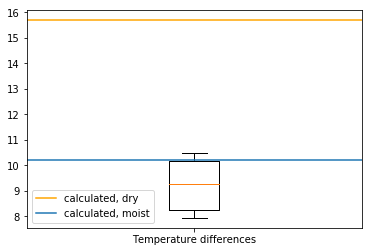

In [369]:
plt.boxplot(temp_avg_diff, labels=['Temperature differences'])
plt.axhline(dry_diff, c='orange', label='calculated, dry')
plt.axhline(moist_diff, label='calculated, moist')
plt.legend()

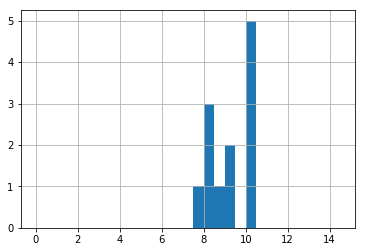

In [500]:
temp_avg_diff.hist(bins=np.arange(0,15,0.5))

The temperature difference between the HistAlp reference elevation and the elevation of the Jungfraujoch station using a moist adiabiatc lapse rate (6.5 K/km) is almost capping the actual differences between the two datasets.

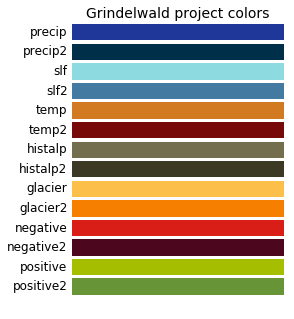

In [937]:
mycolors.view()

In [1115]:
# compute differences
temp_diff_monthly = (temp_df.HISTALP - temp_df.JUN).dropna()

In [1129]:
from scipy import stats

# prepare data
data2fit = temp_diff_monthly
# fit data to normal distribution
mu, std = stats.norm.fit(data=data2fit)

In [1130]:
mu

9.73109072750922

In [1131]:
std

1.1405426999077355

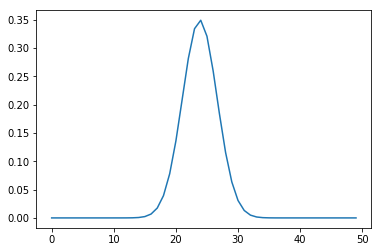

In [1132]:
plt.plot(stats.norm.pdf(np.linspace(0,20), mu, std))

(array([0.00815494, 0.01427115, 0.0285423 , 0.09378186, 0.17737003,
        0.24872579, 0.25891947, 0.21610601, 0.29153925, 0.41182467,
        0.20795107, 0.03873598, 0.00407747]),
 array([ 6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ,
        11.5, 12. , 12.5]),
 <a list of 13 Patch objects>)

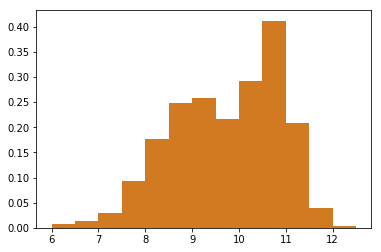

In [1152]:
plt.hist(temp_diff_monthly, bins=np.arange(6,13,0.5), density=True, color=mycolors.temp)

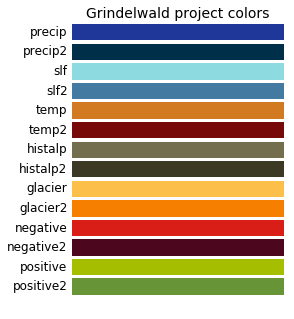

In [1158]:
mycolors.view()

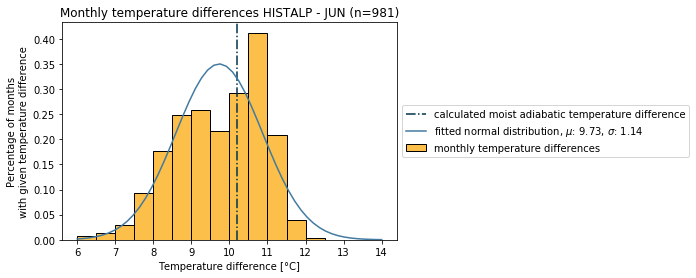

In [1167]:
# 
plt.hist(temp_diff_monthly, bins=np.arange(6,13,0.5), label='monthly temperature differences',
         density=True, color=mycolors.glacier,
         edgecolor='black', linewidth=1)
ax = plt.gca()
# add 
ax.axvline(moist_diff, c=mycolors.precip2, ls='-.',
           label='calculated moist adiabatic temperature difference')
# add title and labels
ax.set_title('Monthly temperature differences HISTALP - JUN (n={})'.format(temp_diff_monthly.size))
ax.set_xlabel('Temperature difference [°C]')
ax.set_ylabel('Percentage of months\nwith given temperature difference')

# add normal distribution
x = np.linspace(6,14)
y = stats.norm.pdf(x, mu, std)
plt.plot(x,y, color=mycolors.slf2, label='fitted normal distribution, $\mu$: {:.2f}, $\sigma$: {:.2f}'.format(mu, std))

plt.legend(loc='center left', bbox_to_anchor=(1,0.5))

plt.gcf().savefig(os.path.join(path_figures, 'temp_diff_histogram.eps'), bbox_inches='tight')